In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import pandas_profiling
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.

['data-scientist-job-market-in-the-us']


/opt/conda/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-123>", line 2, in initialize
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 87, in catch_

In [2]:
base_data_df = pd.read_csv("../input/data-scientist-job-market-in-the-us/alldata.csv")

In [3]:
base_data_df.describe(include='all')

,position,company,description,reviews,location
count,6953,6953,6953,5326.000000,6953
unique,5242,2213,6708,NaN,382
top,Data Scientist,Amazon.com,Note: By applying to this position your applic...,NaN,"Seattle, WA"
freq,351,358,9,NaN,563
mean,NaN,NaN,NaN,3179.089185,NaN
std,NaN,NaN,NaN,8448.515056,NaN
min,NaN,NaN,NaN,2.000000,NaN
25%,NaN,NaN,NaN,27.000000,NaN
50%,NaN,NaN,NaN,230.000000,NaN
75%,NaN,NaN,NaN,1578.000000,NaN


Questions we can start answering given the data :
1. How the jobs are distributed geographically?
2. Which types of positions are in demand geographically?
3. Company vs position vs geography

Given a role, i would like to find the locations in US where such requirement is in demand?


In [4]:
# All the values seem to be categorical
pandas_profiling.ProfileReport(base_data_df)


Number of variables,5
Number of observations,6964
Total Missing (%),4.8%
Total size in memory,272.1 KiB
Average record size in memory,40.0 B
Numeric,1
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [5]:
base_data_df[base_data_df.duplicated()] 
#found out the rows which are called dupicated and they were all NONE. 
#We need to drop them

,position,company,description,reviews,location
331,NaN,NaN,NaN,NaN,NaN
466,NaN,NaN,NaN,NaN,NaN
482,NaN,NaN,NaN,NaN,NaN
3337,NaN,NaN,NaN,NaN,NaN
5014,NaN,NaN,NaN,NaN,NaN
5059,NaN,NaN,NaN,NaN,NaN
5103,NaN,NaN,NaN,NaN,NaN
5114,NaN,NaN,NaN,NaN,NaN
6093,NaN,NaN,NaN,NaN,NaN
6168,NaN,NaN,NaN,NaN,NaN


In [6]:
# Take a copy of the data and perform operations on the same
ds_df = base_data_df.copy()

In [7]:
# Drop all the rows where NaN is found
ds_df.dropna(inplace = True)
ds_df['reviews'].fillna(0, inplace=True)

Text(0.5,0,'Company Name')

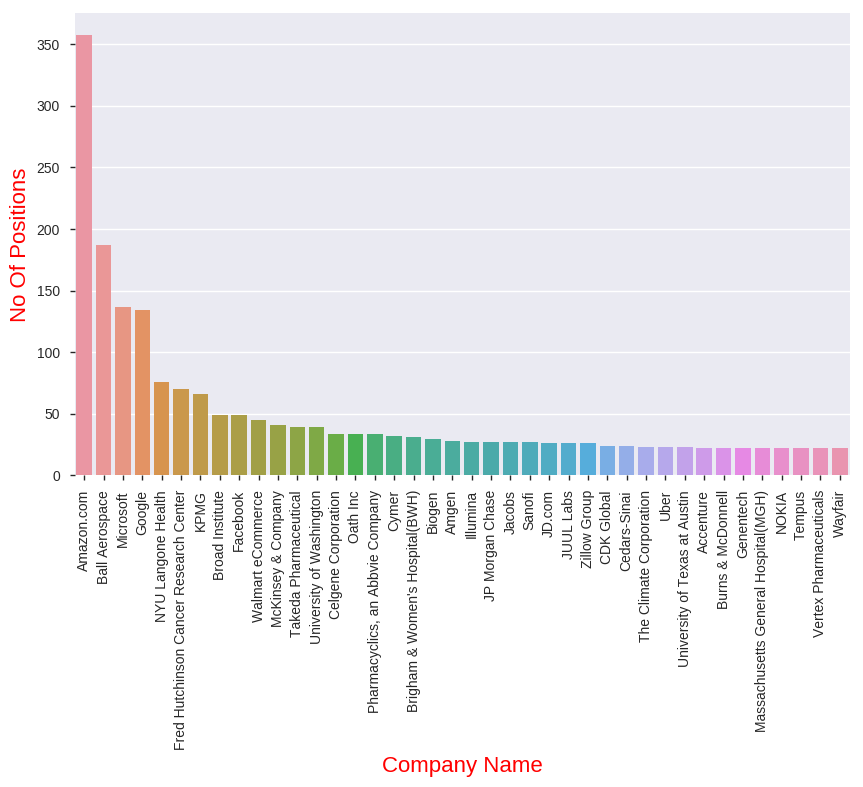

In [8]:
# finding the top 40 companies which has open positions
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
fig,a=plt.subplots(figsize=(10,6))   
sns.barplot(data=ds_df.groupby('company').count().nlargest(40, 'position').reset_index(), x ='company', y='position')
a.set_xticklabels(ds_df.groupby('company').count().nlargest(40, 'position').reset_index()['company'],rotation=90)   
a.set_ylabel('No Of Positions',fontsize=16,color='red')
a.set_xlabel('Company Name',fontsize=16,color='red')


Text(0.5,0,'Designation')

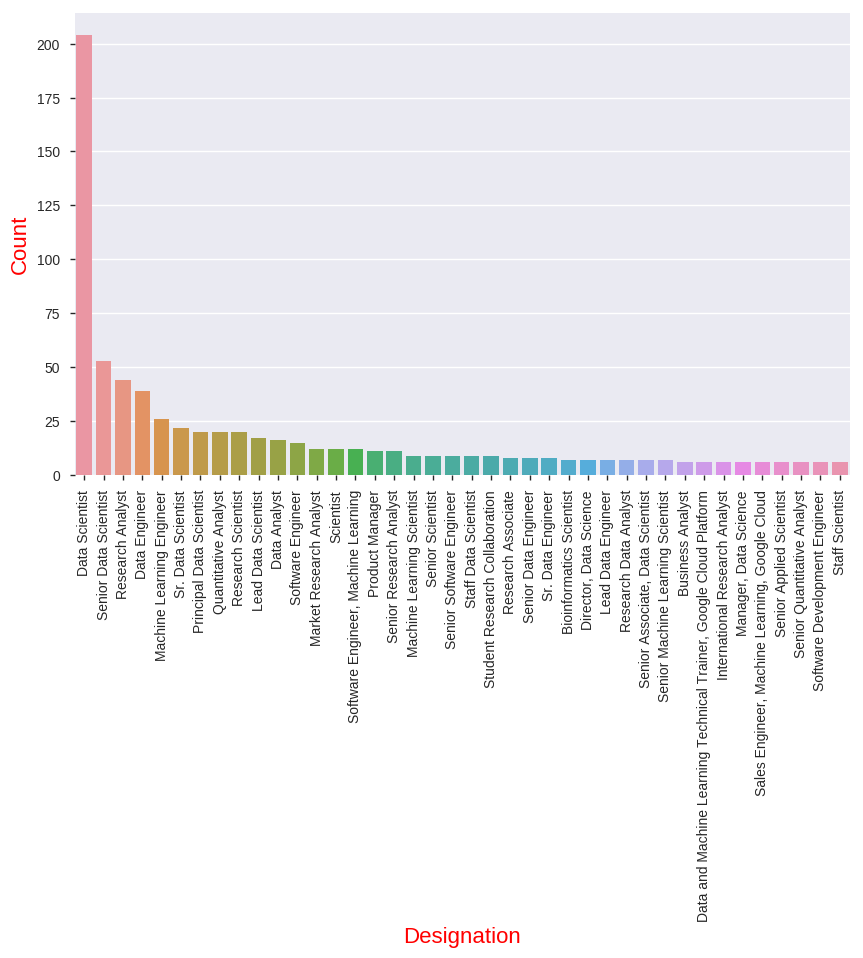

In [9]:
# finding the top 40 designations which are in high demand

from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
fig,a=plt.subplots(figsize=(10,6))   
sns.barplot(data=ds_df.groupby('position').count().nlargest(40, 'company').reset_index(), x ='position', y='company')
a.set_xticklabels(ds_df.groupby('position').count().nlargest(40, 'company').reset_index()['position'],rotation=90)   
a.set_ylabel('Count',fontsize=16,color='red')
a.set_xlabel('Designation',fontsize=16,color='red')

In [10]:
## Grouping the designations into the following roles
## Data Scientist, Lead Data Scientist, Data Engineer, Data Analyst, Director

## Filtered all the directors from the table
ds_df.loc[ds_df['position'].str.contains('Director', case=False) & ds_df['position'].str.contains('data', case=False), 'designation'] = 'Director'

## Filtered all the Data Scientists from the table
ds_df.loc[ds_df['position'] == 'Data Scientist', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Senior Data Scientist', 'designation'] = 'Lead Data Scientist'
ds_df.loc[ds_df['position'] == 'Sr. Data Scientist', 'designation'] = 'Lead Data Scientist'
ds_df.loc[ds_df['position'] == 'Principal Data Scientist', 'designation'] = 'Lead Data Scientist'
ds_df.loc[ds_df['position'] == 'Lead Data Scientist', 'designation'] = 'Lead Data Scientist'
ds_df.loc[ds_df['position'] == 'Staff Data Scientist', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Junior Data Scientist', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Machine Learning Scientist', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Principal Research Scientist', 'designation'] = 'Lead Data Scientist'
ds_df.loc[ds_df['position'] == 'Data Engineer', 'designation'] = 'Data Engineer'
ds_df.loc[ds_df['position'] == 'Research Analyst', 'designation'] = 'Data Engineer'
ds_df.loc[ds_df['position'] == 'Machine Learning Engineer', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Quantitative Analyst', 'designation'] = 'Data Analyst'
ds_df.loc[ds_df['position'] == 'Research Scientist', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Data Analyst', 'designation'] = 'Data Analyst'
ds_df.loc[ds_df['position'] == 'Market Research Analyst', 'designation'] = 'Data Analyst'
ds_df.loc[ds_df['position'] == 'Senior Research Analyst', 'designation'] = 'Data Analyst'
## Check scientist, Senior Scientist, Senior Applied Scientist Staff Scientist,Applied Scientist, Associate Scientist role description
ds_df.loc[ds_df['position'] == 'Software Engineer, Machine Learning', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Senior Data Engineer', 'designation'] = 'Data Engineer'
ds_df.loc[ds_df['position'] == 'Sr. Data Engineer', 'designation'] = 'Data Engineer'
ds_df.loc[ds_df['position'] == 'Lead Data Engineer', 'designation'] = 'Data Engineer'
ds_df.loc[ds_df['position'] == 'Research Data Analyst', 'designation'] = 'Data Analyst'
ds_df.loc[ds_df['position'] == 'Senior Associate, Data Scientist', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Senior Machine Learning Scientist', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Business Analyst', 'designation'] = 'Data Analyst'
ds_df.loc[ds_df['position'] == 'Data and Machine Learning Technical Trainer, Google Cloud Platform', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'International Research Analyst', 'designation'] = 'Data Analyst'
ds_df.loc[ds_df['position'] == 'Manager, Data Science', 'designation'] = 'Lead Data Scientist'
ds_df.loc[ds_df['position'] == 'Sales Engineer, Machine Learning, Google Cloud', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Data Analysis Manager', 'designation'] = 'Data Engineer'
ds_df.loc[ds_df['position'] == 'Data Science Manager', 'designation'] = 'Lead Data Scientist'
ds_df.loc[ds_df['position'] == 'Data Scientist, Analytics', 'designation'] = 'Data Scientist'
ds_df.loc[ds_df['position'] == 'Machine Learning Data Scientist', 'designation'] = 'Data Scientist'

In [11]:
#drop all the designations that are not related to Data Science as we areperforming EDA only on Data science roles
ds_df['designation'].dropna(inplace=True)
#drop all null rows
ds_df.dropna(inplace=True)


Text(0.5,0,'Designation')

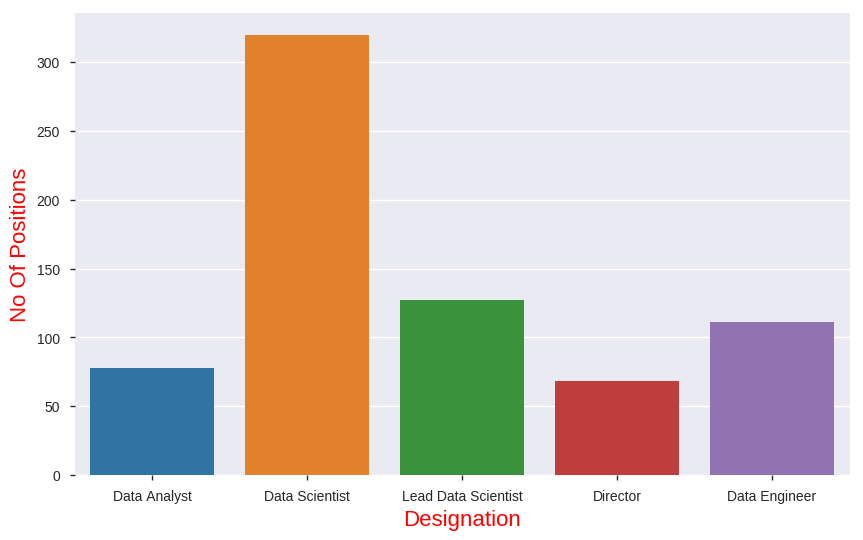

In [12]:
# Finding the no. of positions for the assigned "desingations" across the given data
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
fig,a=plt.subplots(figsize=(10,6))   
sns.countplot(data=ds_df, x ='designation')
a.set_ylabel('No Of Positions',fontsize=16,color='red')
a.set_xlabel('Designation',fontsize=16,color='red')


## the same plot can be done using this would be already sorted
## ds_df['designation'].value_counts().plot.bar()


In [13]:
ds_df['location'].value_counts().head(50)

# We can observe that different location with similar names are having different vaulues.
# for example Washington DC and Washington, DC 20036 both are pointing to the same location hence we need to rename
# there are many various other examples for the same whihc is reflected in below data
# all such locations in a standard format

New York, NY               113
San Francisco, CA           73
Chicago, IL                 41
Boston, MA                  34
Seattle, WA                 28
Washington, DC              24
Los Angeles, CA             20
Atlanta, GA                 17
San Diego, CA               15
Mountain View, CA           14
Cambridge, MA               13
Sunnyvale, CA               11
Austin, TX                   8
Redmond, WA 98052            6
Washington, DC 20036         6
Seattle, WA 98104            6
New York, NY 10016           5
Manhattan, NY                5
Boston, MA 02110             5
Atlanta, GA 30338            5
Redwood City, CA             5
New York, NY 10041           5
San Mateo, CA                5
Chicago, IL 60601            5
San Francisco, CA 94103      5
Boulder, CO                  5
San Francisco, CA 94104      5
San Francisco, CA 94105      5
New York, NY 10003           4
Mountain View, CA 94041      4
Redmond, WA                  4
Mountain View, CA 94043      4
New York

In [14]:
# Renaming al the location in standard format
ds_df.loc[ds_df['location'].str.contains('New York', case=False), 'location'] = 'New York'
ds_df.loc[ds_df['location'].str.contains('San Francisco', case=False), 'location'] = 'San Francisco'
ds_df.loc[ds_df['location'].str.contains('San Diego', case=False), 'location'] = 'San Diego'
ds_df.loc[ds_df['location'].str.contains('Atlanta', case=False), 'location'] = 'Atlanta'
ds_df.loc[ds_df['location'].str.contains('Chicago', case=False), 'location'] = 'Chicago'
ds_df.loc[ds_df['location'].str.contains('Seattle', case=False), 'location'] = 'Seattle'
ds_df.loc[ds_df['location'].str.contains('Boston', case=False), 'location'] = 'Boston'
ds_df.loc[ds_df['location'].str.contains('Washington', case=False), 'location'] = 'Washington'
ds_df.loc[ds_df['location'].str.contains('Los Angeles', case=False), 'location'] = 'Los Angeles'
ds_df.loc[ds_df['location'].str.contains('Mountain View', case=False), 'location'] = 'Mountain View'
ds_df.loc[ds_df['location'].str.contains('Cambridge', case=False), 'location'] = 'Cambridge'
ds_df.loc[ds_df['location'].str.contains('Sunnyvale', case=False), 'location'] = 'California'
ds_df.loc[ds_df['location'].str.contains('CA', case=True), 'location'] = 'California'
ds_df.loc[ds_df['location'].str.contains('NJ', case=True), 'location'] = 'New Jersey'
ds_df.loc[ds_df['location'].str.contains('NY', case=True), 'location'] = 'New York'
ds_df.loc[ds_df['location'].str.contains('TX', case=True), 'location'] = 'Texas'
ds_df.loc[ds_df['location'].str.contains('WA', case=True), 'location'] = 'Washington'

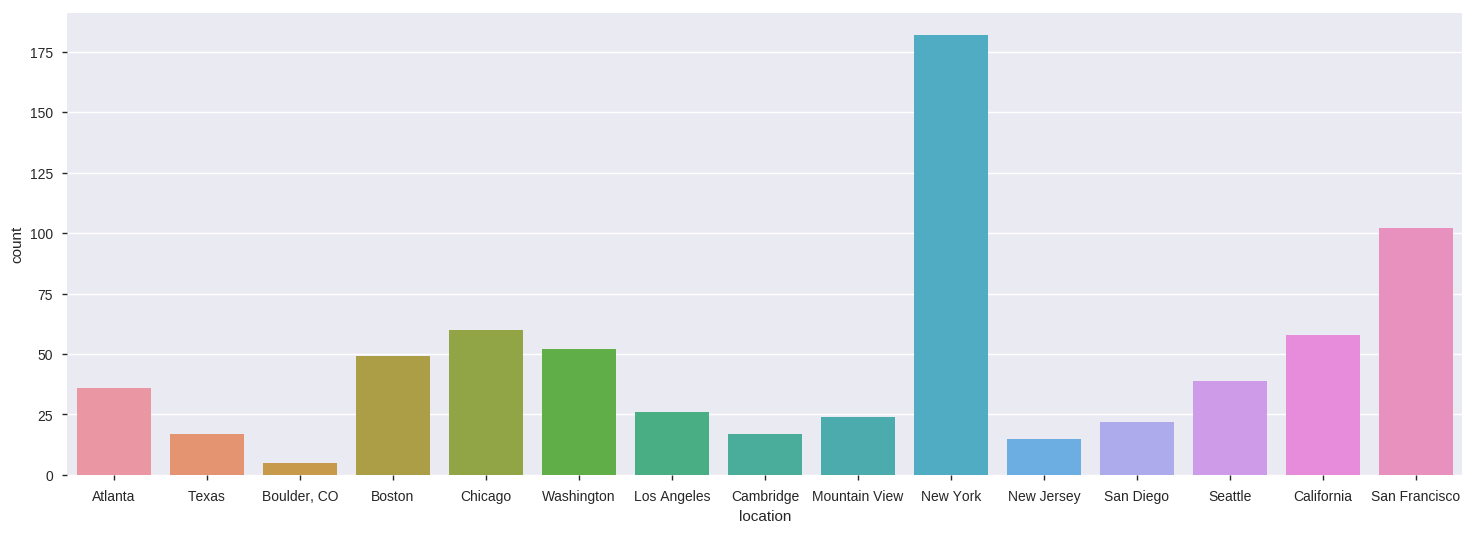

In [15]:
# How the jobs are distributed geographically?
from matplotlib.pyplot import figure, show
width=18
height=6
figure(figsize=(width,height))
#sns.barplot(data=ds_df.groupby(['location'])['position'].count().reset_index(), x='location', y='position')
sns.countplot(data=ds_df, x='location')
show()


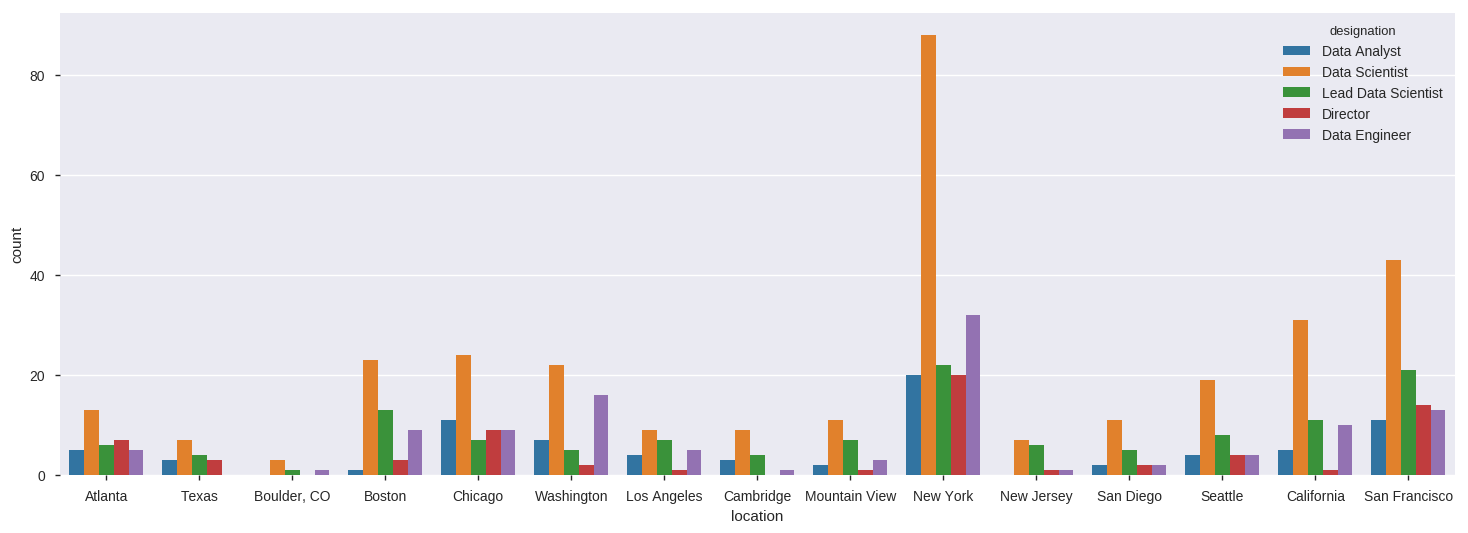

In [16]:
# Based on the previous graph we have only figured out total open positions at every location
# It would be more intuitive if we know different designated open positions at each location, let us plot that.
#This can be achieved by adding hue paramter to the above graph plot
from matplotlib.pyplot import figure, show
width=18
height=6
figure(figsize=(width,height))
sns.countplot(data=ds_df, x='location',hue='designation')
show()


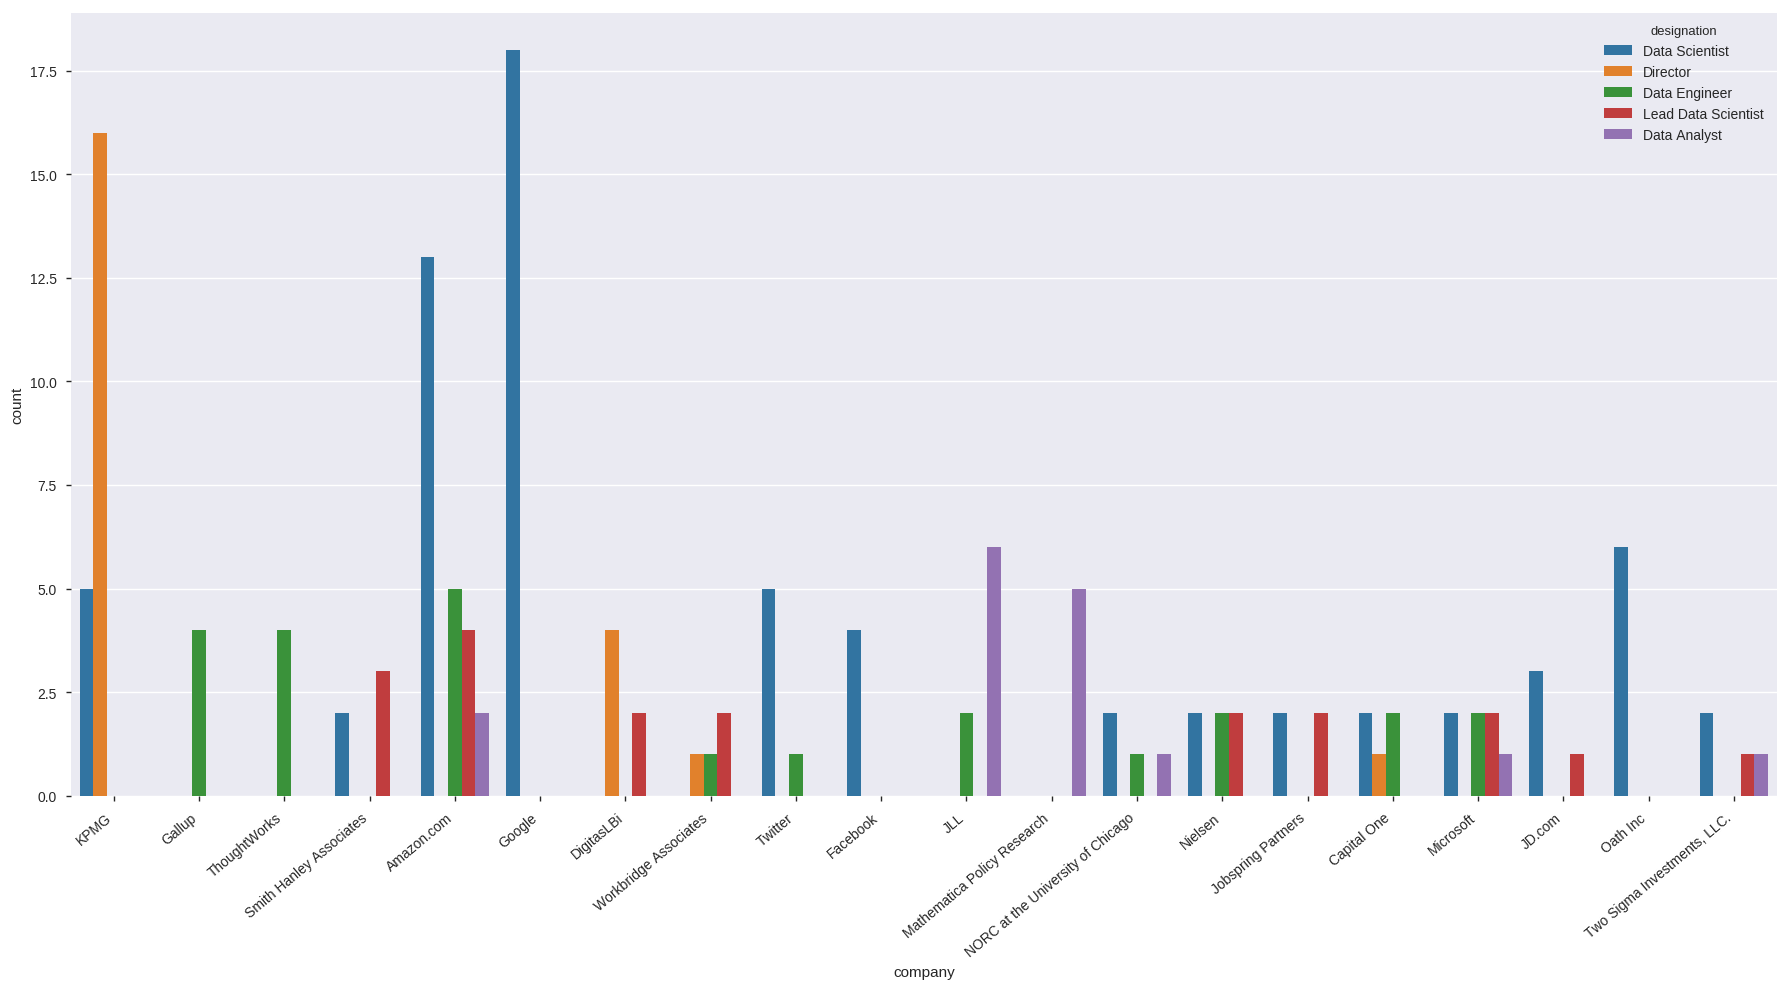

In [17]:
top_20_company_list = ds_df.groupby(['company'])['location'].count().reset_index().sort_values('location',ascending=False).head(20)['company'].tolist()
# Based on the previous graph we have only figured out total open positions at every location
# It would be more intuitive if we know different designated open positions at each location, let us plot that.
# It can be achieved by adding hue to the above countplot
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
fig,a=plt.subplots(figsize=(18,10))   
ax = sns.countplot(data=ds_df[ds_df['company'].isin(top_20_company_list)], x='company',hue='designation')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


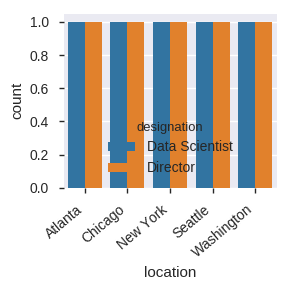

In [18]:
df_final =  pd.DataFrame(ds_df.groupby(['company','location','designation'])['position'].count().reset_index())

# for company KPMG how are the postions at different location distributed with designation
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
fig,a=plt.subplots(figsize=(3,3))   
ax = sns.countplot(data=df_final[df_final['company'] == 'KPMG'], x='location',hue='designation')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

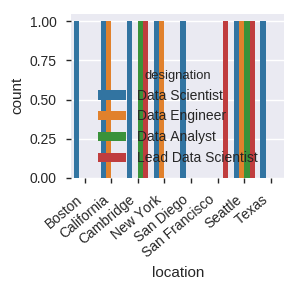

In [19]:
# for company Amazon how are the postions at different location distributed with designation
fig,a=plt.subplots(figsize=(3,3))  
ax = sns.countplot(data=df_final[df_final['company'] == 'Amazon.com'], x='location',hue='designation')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

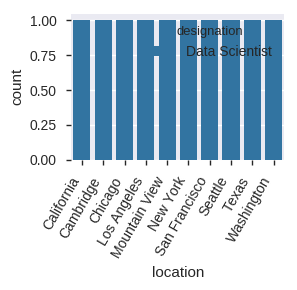

In [20]:
# for company Google how are the postions at different location distributed with designation
fig,a=plt.subplots(figsize=(3,3))  
ax = sns.countplot(data=df_final[df_final['company'] == 'Google'], x='location',hue='designation')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
plt.show()

**Conclusion :**
Observe the plots placed between :
*      Location Vs Designation count
*      Company Vs Designation count
     
We can observe that Data scientist role is in high demand across any company and any location 
but if we consider in particular about New York one can find that it has lot number of open positions for different roles out there.
Also company wise if we see Amazon, Google and KPMG has lot of open positions for Data science roles.